<a href="https://colab.research.google.com/github/Lucas-F-Analysis/Lucas-F-Analysis/blob/main/Actividad_de_Presion_Arterial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataSet_Edad-Talla-Peso-TA.csv', sep=';')
df

,Altura,Peso,Sexo,Edad,PA_max
0,"1,47",53000,M,33,"12,3"
1,172,90,F,28,"13,3"
2,"1,6",118,M,77,"24,9"
3,"1,76",97,M,52,"18,3"
4,"1,81",118,F,73,"25,8"
...,...,...,...,...,...
4995,"1,85",105,M,74,"13,6"
4996,"1,78",66,F,31,"9,9"
4997,"1,81",168,F,57,"15,5"
4998,"2,04",99,M,44,"11,8"


In [ ]:
# Convertir de string las variables Alutra y PA_max en variables float
# Y convertir las comas en puntos
df['Altura'] = df['Altura'].str.replace(',', '.').astype(float)
df['PA_max'] = df['PA_max'].str.replace(',', '.').astype(float)

In [ ]:
# Reemplazar 'M' por 0 y 'F' por 1 en la columna 'genero'
df['Sexo'] = df['Sexo'].replace({'M': 0, 'F': 1})

In [ ]:
df.describe()

,Altura,Peso,Sexo,Edad,PA_max
count,4901.000000,5000.00000,4910.000000,5000.000000,5000.000000
mean,8.013291,1102.30400,0.513238,47.875000,16.422520
std,32.148415,8753.19627,0.499876,17.300833,13.776803
min,1.450000,0.00000,0.000000,18.000000,8.400000
25%,1.600000,64.00000,0.000000,33.000000,12.500000
50%,1.700000,80.00000,1.000000,48.000000,14.400000
75%,1.820000,104.00000,1.000000,63.000000,16.900000
max,226.000000,123000.00000,1.000000,77.000000,193.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Altura  4901 non-null   float64
 1   Peso    5000 non-null   int64  
 2   Sexo    4910 non-null   float64
 3   Edad    5000 non-null   int64  
 4   PA_max  5000 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 195.4 KB


In [ ]:
valores_nulos_por_columna = df.isnull().sum()

# Mostrar la cantidad de valores nulos por columna, rellenar valores con media o modas si la muestra es chica
print(valores_nulos_por_columna)

Altura    99
Peso       0
Sexo      90
Edad       0
PA_max     0
dtype: int64


In [ ]:
# Eliminación de valores nulos del set de datos
df = df.dropna()

valores_nulos_por_columna = df.isnull().sum()

# Mostrar la cantidad de valores nulos por columna, rellenar valores con media o modas si la muestra es chica
print(valores_nulos_por_columna)

Altura    0
Peso      0
Sexo      0
Edad      0
PA_max    0
dtype: int64


In [ ]:
num_duplicadas = df.duplicated().sum()
print(f"Hay {num_duplicadas} filas duplicadas.")

Hay 1 filas duplicadas.


In [ ]:
# Eliminacion de duplicados del set de datos
df_sin_duplicados = df.drop_duplicates()

In [ ]:
num_duplicadas = df_sin_duplicados.duplicated().sum()
print(f"Hay {num_duplicadas} filas duplicadas.")

Hay 0 filas duplicadas.


In [ ]:
print(df_sin_duplicados.dtypes)

Altura    float64
Peso        int64
Sexo      float64
Edad        int64
PA_max    float64
dtype: object


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

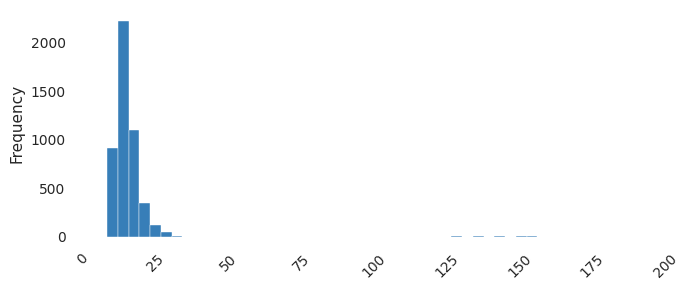

In [ ]:
!pip install ydata-profiling # install the package using pip
from ydata_profiling import ProfileReport # import the module from the installed package

# Generar el perfil del dataset
profile = ProfileReport(df, title='Reporte del Dataset')

# Mostrar el reporte
profile.to_notebook_iframe()

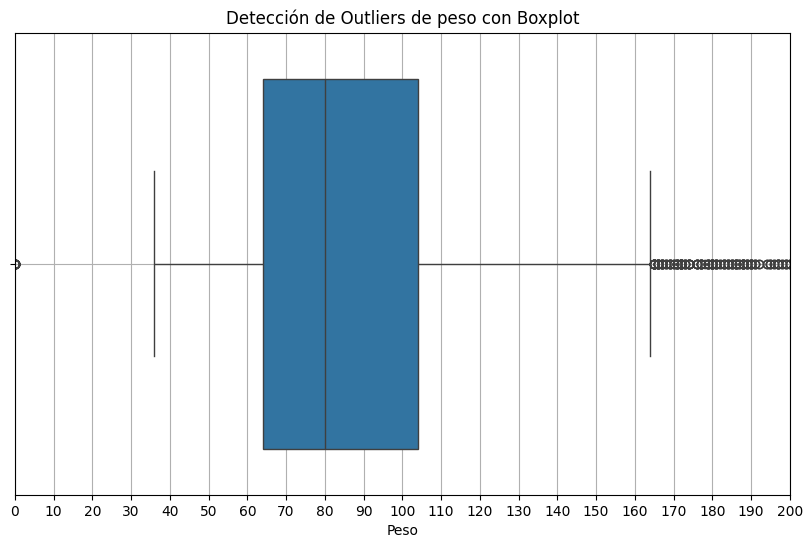

In [ ]:
# Crear un boxplot para la columna de interés
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Peso'])

# Mostrar el gráfico
plt.title('Detección de Outliers de peso con Boxplot')
plt.xlim(0, 200)
plt.xticks(range(0, 201, 10))
plt.grid(True)
plt.show()

Dentro de la "caja" tenemos el 50% central de los datos. El límite inferior de la caja corresponde al primer cuartil, el 25% de los datos, y el límite superior corresponde al tercer cuartil, el 75% de los datos.

El 50% central de los pesos está entre aproximadamente 63 kg y 104 kg.
La mediana parece estar en los 80 kg, lo que indica que el peso central de la mayoría de las personas está en este valor.

Los "bigotes" se extienden hasta los valores más pequeños y más grandes, van aproximadamente desde 36 kg hasta 164 kg, lo que se encuentre fuera de este rango son considerados "no atípicos" u "outliers".

Aquí se observan varios puntos superiores a los 164 kg, lo que indica que hay personas con pesos considerablemente superiores a la mayoría, que pueden ser considerados como valores atípicos.

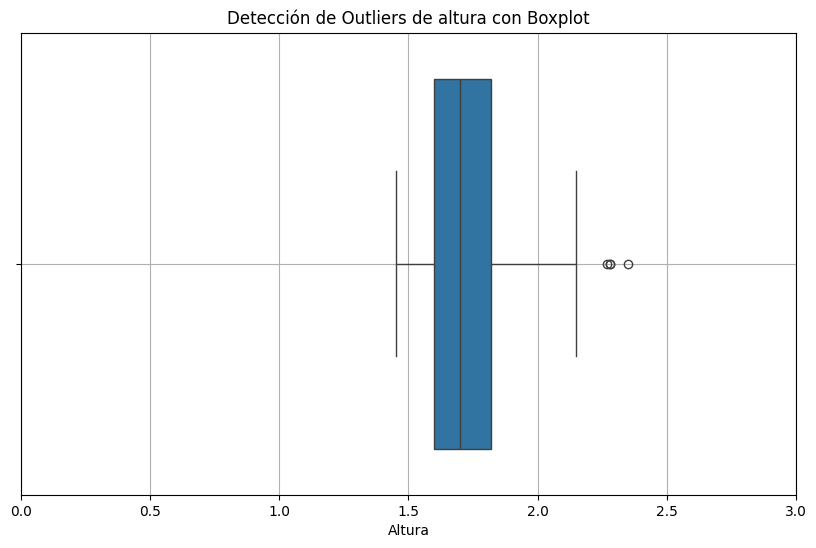

In [ ]:
# Crear un boxplot para la columna de interés
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Altura'])

# Mostrar el gráfico
plt.title('Detección de Outliers de altura con Boxplot')
plt.xlim(0, 3)
plt.grid(True)
plt.show()

Dentro de la "caja" tenemos el 50% central de los datos. El límite inferior de la caja corresponde al primer cuartil, el 25% de los datos, y el límite superior corresponde al tercer cuartil, el 75% de los datos.

El 50% central de las alturas está entre aproximadamente 1.6 m y 1.8 m . La mediana parece estar en los 1.7 m, lo que indica que la altura central de la mayoría de las personas está en este valor.

Los "bigotes" se extienden hasta los valores más pequeños y más grandes, van aproximadamente desde 1.4 m hasta 2.2 m, lo que se encuentre fuera de este rango son considerados "no atípicos" u "outliers".

Aquí se observan pocos puntos superiores a los 2.2 m, lo que indica que hay pocas personas con alturas considerablemente superiores a la mayoría, que pueden ser considerados como valores atípicos.

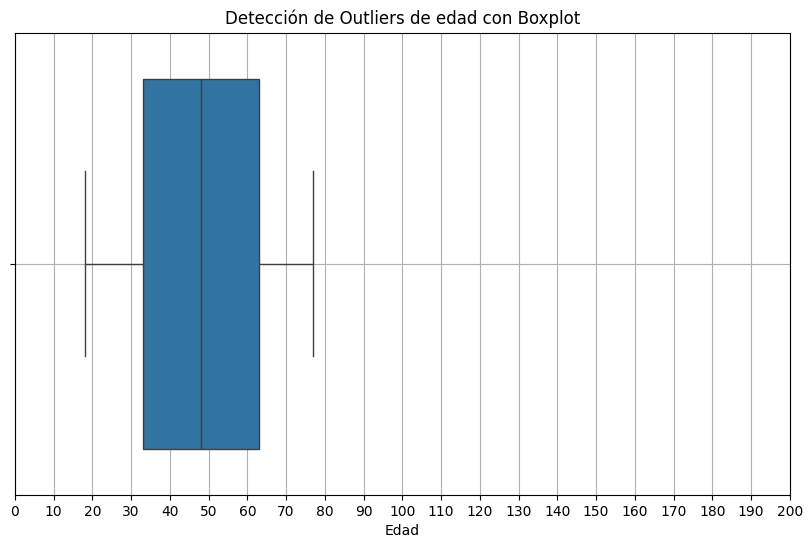

In [ ]:
# Crear un boxplot para la columna de interés
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Edad'])

# Mostrar el gráfico
plt.title('Detección de Outliers de edad con Boxplot')
plt.xlim(0, 200)
plt.xticks(range(0, 201, 10))
plt.grid(True)
plt.show()

El gráfico es simetrico

Dentro de la "caja" tenemos el 50% central de los datos. El límite inferior de la caja corresponde al primer cuartil, el 25% de los datos, y el límite superior corresponde al tercer cuartil, el 75% de los datos.

El 50% central de las edades está entre aproximadamente 32 años y 62 años. La mediana parece estar en los 48 años, lo que indica que la altura central de la mayoría de las personas está en este valor.

Los "bigotes" se extienden hasta los valores más pequeños y más grandes, van aproximadamente desde los 18 años hasta los 78 años, lo que se encuentre fuera de este rango son considerados "no atípicos" u "outliers".

Aquí no se observan puntos por fuera del rango de los "bigotes", lo que indica que no hay personas con edades considerablemente superiores a la mayoría

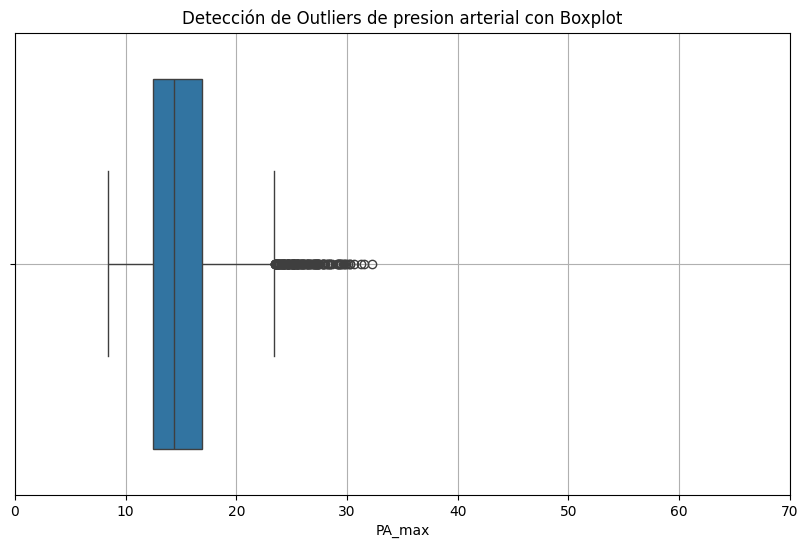

In [ ]:
# Crear un boxplot para la columna de interés
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['PA_max'])

# Mostrar el gráfico
plt.title('Detección de Outliers de presion arterial con Boxplot')
plt.xlim(0, 70)
plt.grid(True)
plt.show()

Dentro de la "caja" tenemos el 50% central de los datos. El límite inferior de la caja corresponde al primer cuartil, el 25% de los datos, y el límite superior corresponde al tercer cuartil, el 75% de los datos.

El 50% central de las PA está entre aproximadamente 11.5 mmHg y 16 mmHg. La mediana parece estar en los 14 mmHg, lo que indica que la PA de la mayoría de las personas está en este valor.

Los "bigotes" se extienden hasta los valores más pequeños y más grandes, van aproximadamente desde 8 mmHg hasta 24 mmHg, lo que se encuentre fuera de este rango son considerados "no atípicos" u "outliers".

Aquí se observan varios puntos superiores a los 24 mmHg, lo que indica que hay muchas personas con PA considerablemente superiores a la mayoría, que pueden ser considerados como valores atípicos.

In [ ]:
df_nuevo = df_sin_duplicados.copy()

In [ ]:
# Eliminando pesos irrealmente pesados
mask = df_nuevo['Peso'] > 400

# Eliminar las filas donde la condición es verdadera
df_nuevo.drop(index=df_nuevo[mask].index, inplace=True)

In [ ]:
# Eliminacion de pesos irrealmente livianos
mask = df_nuevo['Peso'] < 20

# Eliminar las filas donde la condición es verdadera
df_nuevo.drop(index=df_nuevo[mask].index, inplace=True)

In [ ]:
# # OJO ACA, hay una gran reduccion de filas

# # Eliminacion de presiones arteriales ilogicas
# mask = df_nuevo['PA_max'] < 40

# # Eliminar las filas donde la condición es verdadera
# df_nuevo.drop(index=df_nuevo[mask].index, inplace=True)

In [ ]:
# Definir una función para convertir las alturas a centimetros
def convertir_a_metros(altura):
    # Si el valor de altura es mayor a 100, se asume que está en cm y se convierte a metros
    if altura > 100:
        return altura / 100
    else:
        return altura

# Aplicar la función a la columna de altura
df_nuevo['Altura'] = df_nuevo['Altura'].apply(convertir_a_metros)

# Mostrar las primeras filas del DataFrame para verificar la conversión
print(df_nuevo.head())

   Altura  Peso  Sexo  Edad  PA_max
1    1.72    90   1.0    28    13.3
2    1.60   118   0.0    77    24.9
3    1.76    97   0.0    52    18.3
4    1.81   118   1.0    73    25.8
5    1.71    69   1.0    18     9.8


In [ ]:
# Definir una función para convertir las PA excesivamente altas a valores normales
def convertir_presiones(presion):
    # Si el valor de altura es mayor a 22, se asume que es ilógico y se convierte
    if presion > 22:
        return presion / 10
    else:
        return presion

# Aplicar la función a la columna de PA_max
df_nuevo['PA_max'] = df_nuevo['PA_max'].apply(convertir_presiones)

# Mostrar las primeras filas del DataFrame para verificar la conversión
print(df_nuevo.head())

   Altura  Peso  Sexo  Edad  PA_max
1    1.72    90   1.0    28   13.30
2    1.60   118   0.0    77    2.49
3    1.76    97   0.0    52   18.30
4    1.81   118   1.0    73    2.58
5    1.71    69   1.0    18    9.80


In [ ]:
# Verificar si todas las alturas están en el rango esperado (en metros)
print(df['Altura'].describe())
print(df_nuevo['Altura'].describe())

count    4812.000000
mean        7.920064
std        31.922850
min         1.450000
25%         1.600000
50%         1.700000
75%         1.820000
max       226.000000
Name: Altura, dtype: float64
count    4715.000000
mean        1.706119
std         0.142451
min         1.450000
25%         1.600000
50%         1.690000
75%         1.800000
max         2.350000
Name: Altura, dtype: float64


In [ ]:
df_nuevo.describe()

,Altura,Peso,Sexo,Edad,PA_max
count,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000
mean,1.706119,88.323648,0.515164,47.802121,13.897162
std,0.142451,34.408444,0.499823,17.329534,3.790186
min,1.450000,36.000000,0.000000,18.000000,2.210000
25%,1.600000,64.000000,0.000000,33.000000,12.100000
50%,1.690000,80.000000,1.000000,47.000000,14.000000
75%,1.800000,102.000000,1.000000,63.000000,16.200000
max,2.350000,289.000000,1.000000,77.000000,22.000000


In [ ]:
print("Cantidad de generos a analizar: ", len(set(df_nuevo["Sexo"])))
diferentes = df_nuevo.Sexo.value_counts()
print(diferentes)

Cantidad de generos a analizar:  2
Sexo
1.0    2429
0.0    2286
Name: count, dtype: int64


In [ ]:
# Agregar IMC al set de datos
df_nuevo['IMC'] = df_nuevo['Peso'] / (df_nuevo['Altura'] ** 2)

In [ ]:
# Agregar porcentaje de grasa corporal
df_nuevo['PGC'] = (1.2 * df_nuevo['IMC']) + (0.23 * df_nuevo['Edad']) - (10.8 * df_nuevo['Sexo']) - 5.4

In [ ]:
# Agregar Tasa metabólica basal
def calcular_tmb(row):
    if row['Sexo'] == 1.0:  # Para hombres
        return 88.362 + (13.397 * row['Peso']) + (4.799 * row['Altura']) - (5.677 * row['Edad'])
    elif row['Sexo'] == 0.0:  # Para mujeres
        return 447.593 + (9.247 * row['Peso']) + (3.098 * row['Altura']) - (4.330 * row['Edad'])
    else:
        return None  # En caso de datos faltantes o errores

In [ ]:
df_nuevo['TMB'] = df_nuevo.apply(calcular_tmb, axis=1)

In [ ]:
# Agregar IMC por edad
df_nuevo['IMC_edad'] = df_nuevo['IMC'] * df_nuevo['Edad']

In [ ]:
df_nuevo.describe()

,Altura,Peso,Sexo,Edad,PA_max,IMC,PGC,TMB,IMC_edad
count,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000
mean,1.706119,88.323648,0.515164,47.802121,13.897162,29.896740,35.906801,1036.061049,1430.003101
std,0.142451,34.408444,0.499823,17.329534,3.790186,9.544170,13.182887,408.211158,714.224194
min,1.450000,36.000000,0.000000,18.000000,2.210000,17.122473,10.138115,173.002540,346.098382
25%,1.600000,64.000000,0.000000,33.000000,12.100000,23.131589,26.434156,766.424285,906.139450
50%,1.690000,80.000000,1.000000,47.000000,14.000000,27.239224,33.773225,955.984380,1317.940441
75%,1.800000,102.000000,1.000000,63.000000,16.200000,31.975015,42.981865,1210.148425,1774.750612
max,2.350000,289.000000,1.000000,77.000000,22.000000,65.507685,89.578459,3839.697880,4756.464573


<Axes: >

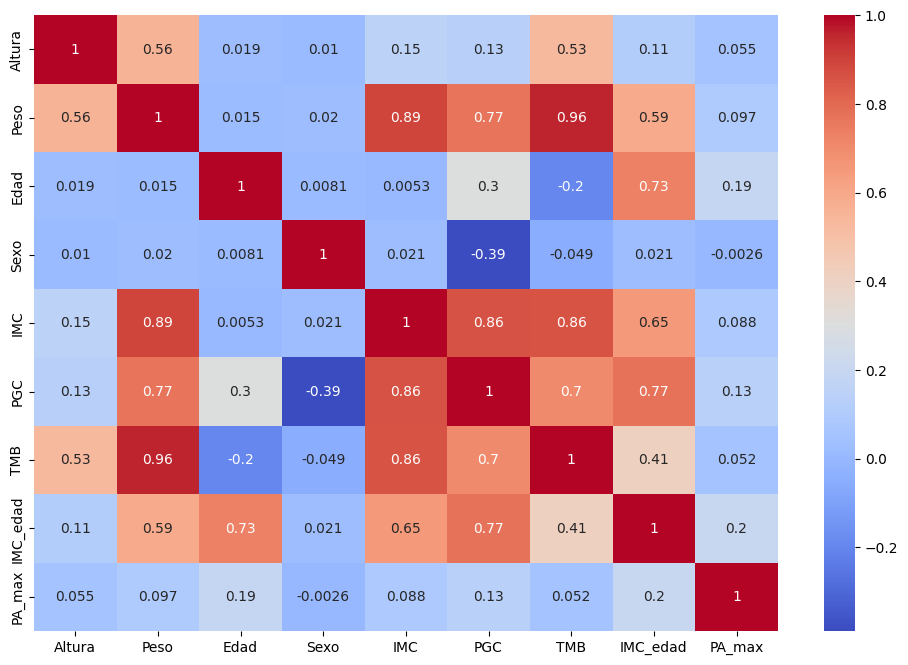

In [ ]:
columnas = ['Altura', 'Peso', 'Edad', 'Sexo', 'IMC', 'PGC', 'TMB', 'IMC_edad', 'PA_max']
df_util = df_nuevo[columnas]

plt.figure(figsize=(12,8))
sns.heatmap(df_util.corr(),cmap='coolwarm',annot=True)

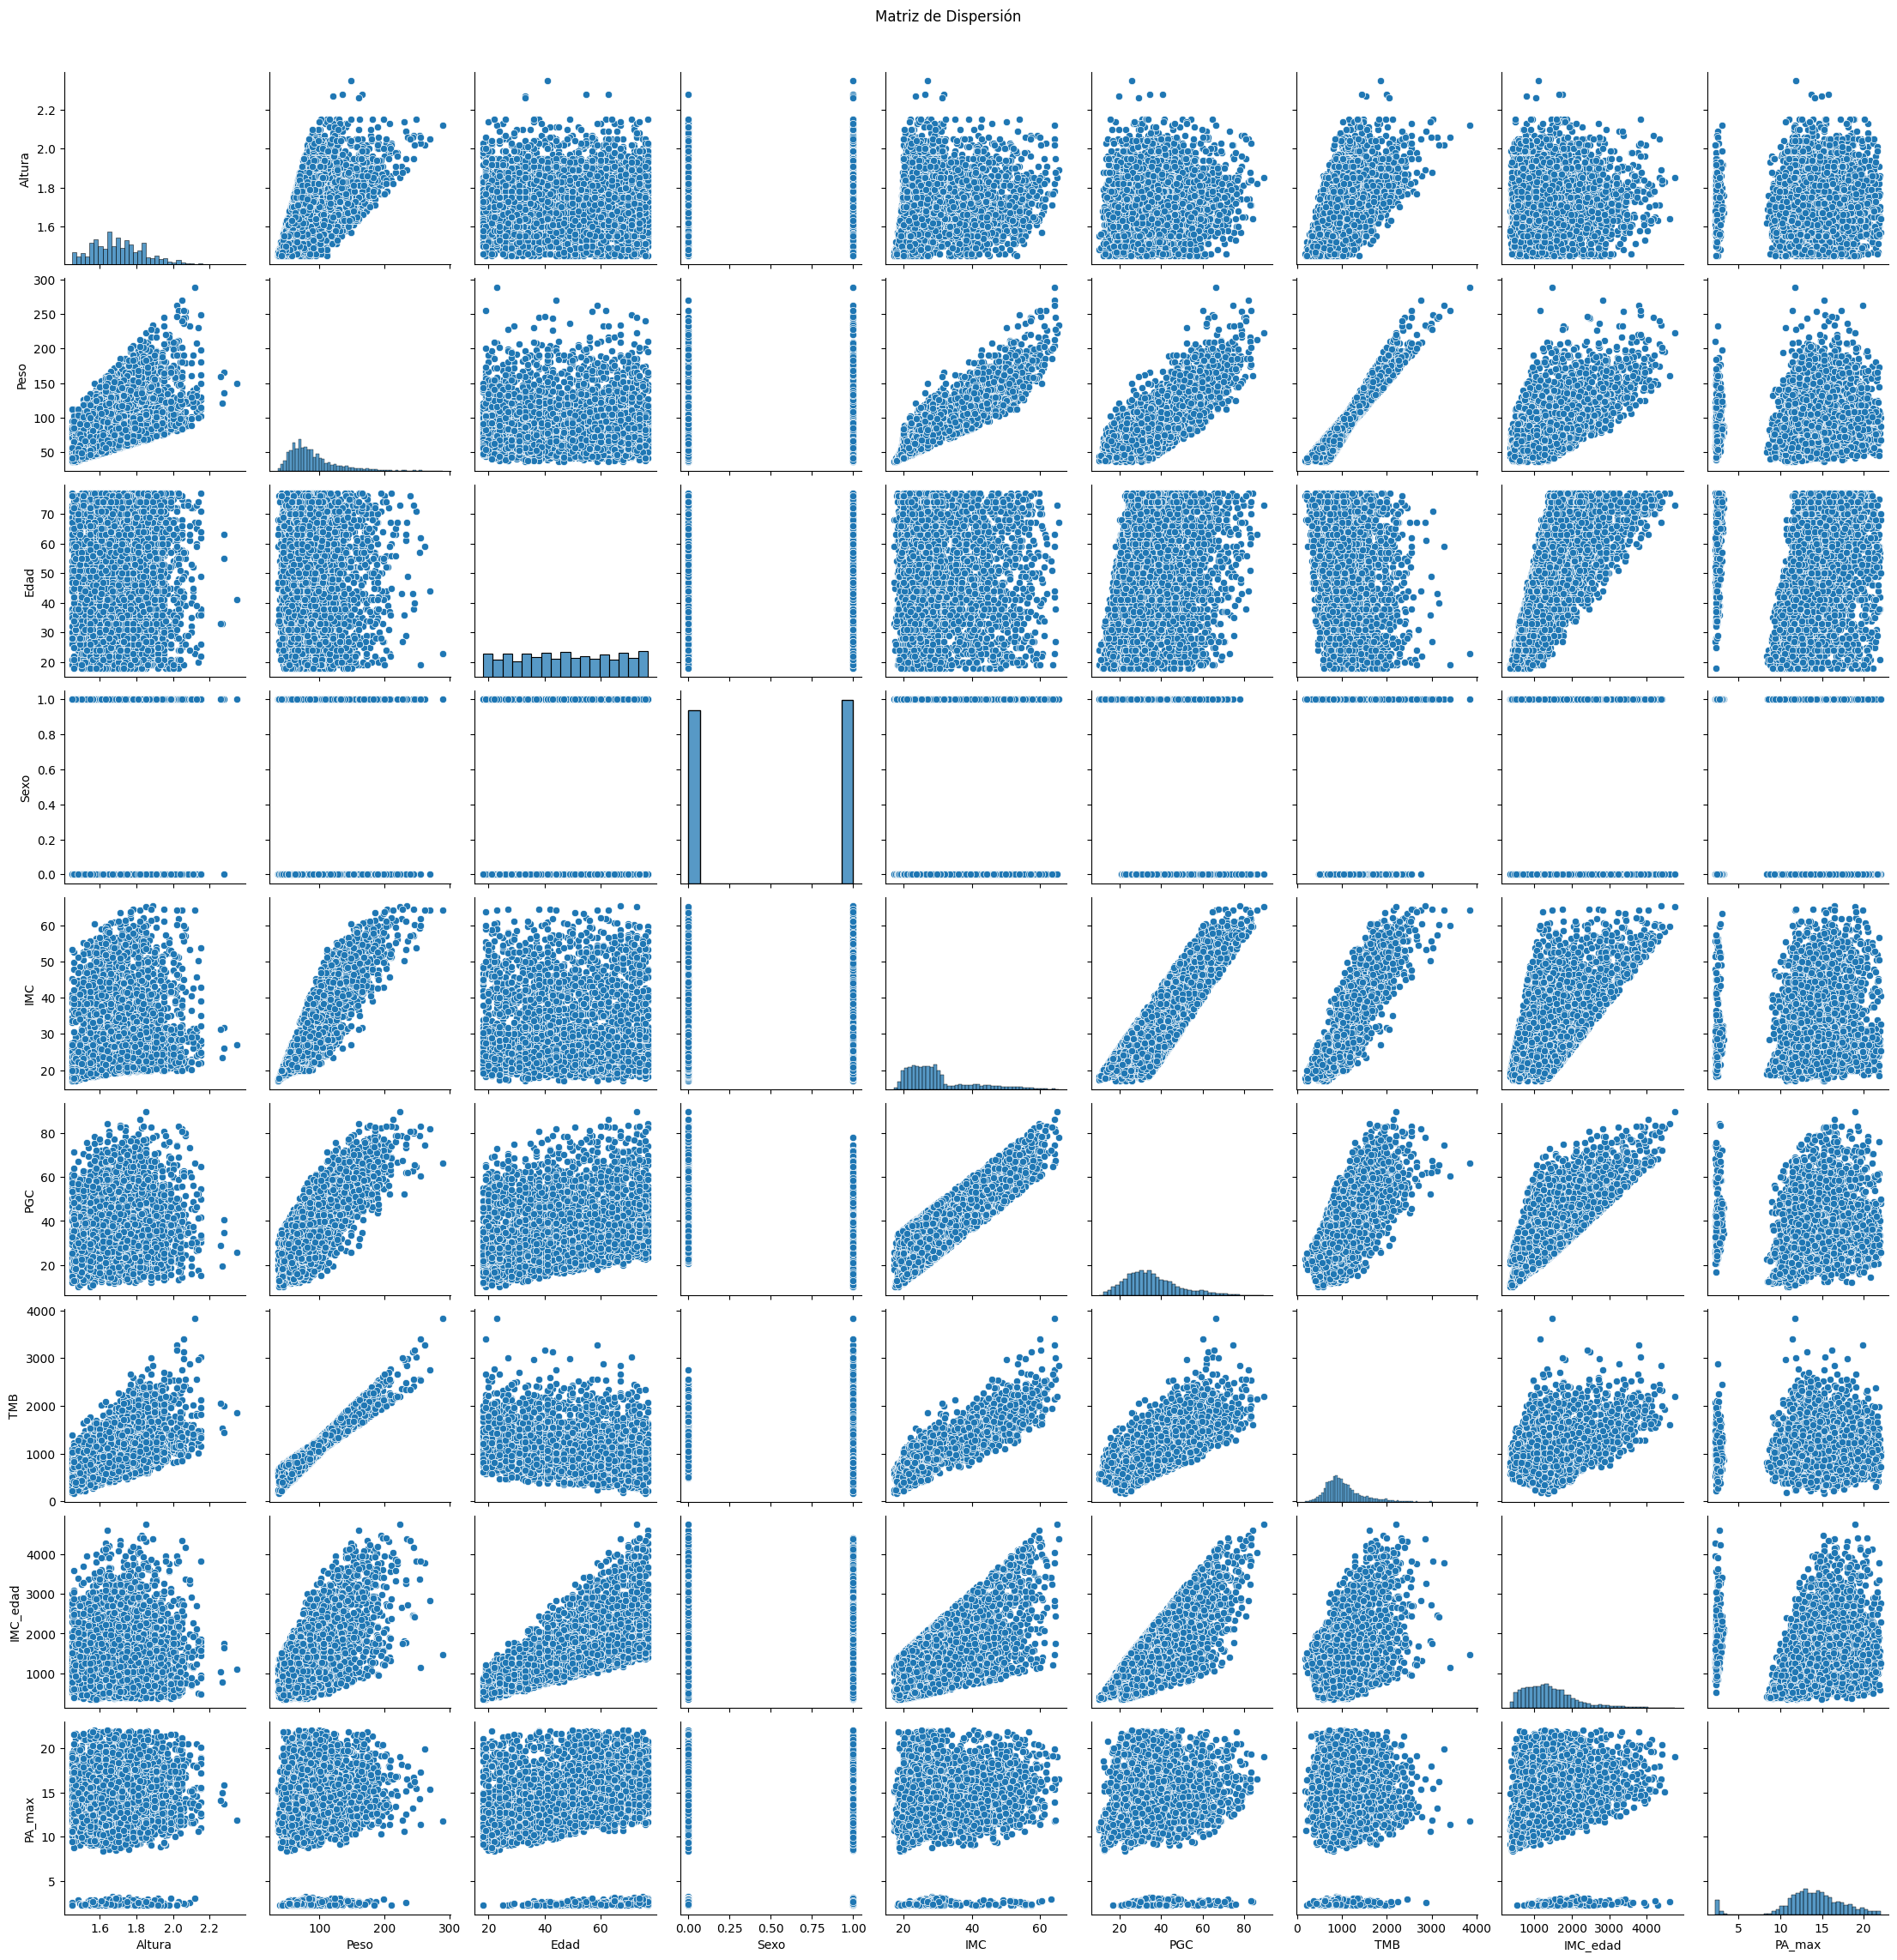

In [ ]:
numerical_columns = ['Altura', 'Peso', 'Edad', 'Sexo', 'IMC', 'PGC', 'TMB', 'IMC_edad', 'PA_max']

# Usar pairplot de seaborn para crear una matriz de dispersión
sns.pairplot(df_util[numerical_columns])
plt.suptitle('Matriz de Dispersión', y=1.02)
plt.show()

# Regresion Lineal

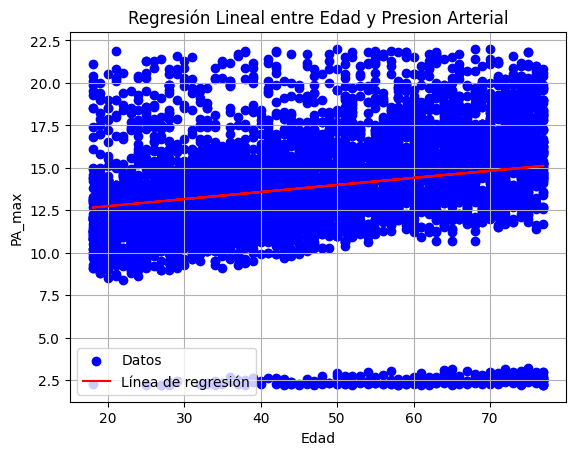

Pendiente (m): 0.04162939109475527
Intersección (b): 11.907189062423411


In [ ]:
# Hacer Regresion Lineal de cada columna respecto a PA_max
x = df_util['Edad']  # Variable independiente
y = df_util['PA_max']   # Variable dependiente

# Calcular la regresión lineal
n = len(x)
m = (n * np.sum(x * y) - np.sum(x) * np.sum(y)) / (n * np.sum(x**2) - (np.sum(x))**2)
b = (np.sum(y) - m * np.sum(x)) / n

# Generar los valores predichos
y_pred = m * x + b

# Graficar los datos y la línea de regresión
plt.scatter(x, y, color='blue', label='Datos')
plt.plot(x, y_pred, color='red', label='Línea de regresión')
plt.xlabel('Edad')
plt.ylabel('PA_max')
plt.title('Regresión Lineal entre Edad y Presion Arterial')
plt.legend()
plt.grid()
plt.show()

# Mostrar la pendiente y la intersección
print(f'Pendiente (m): {m}')
print(f'Intersección (b): {b}')

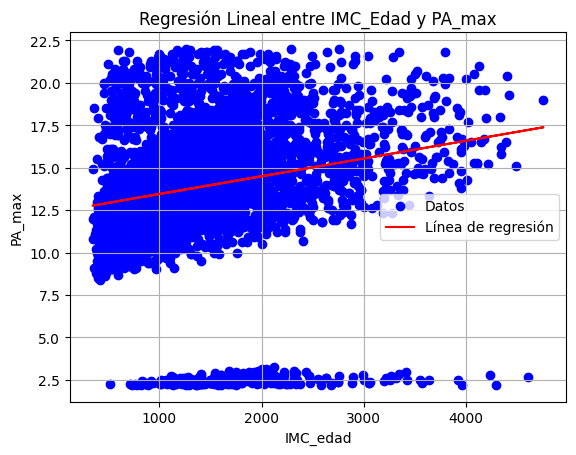

Pendiente (m): 0.0010463162471734465
Intersección (b): 12.400926770506244


In [ ]:
# Hacer Regresion Lineal de cada columna respecto a PA_max
x = df_util['IMC_edad']  # Variable independiente
y = df_util['PA_max']   # Variable dependiente

# Calcular la regresión lineal
n = len(x)
m = (n * np.sum(x * y) - np.sum(x) * np.sum(y)) / (n * np.sum(x**2) - (np.sum(x))**2)
b = (np.sum(y) - m * np.sum(x)) / n

# Generar los valores predichos
y_pred = m * x + b

# Graficar los datos y la línea de regresión
plt.scatter(x, y, color='blue', label='Datos')
plt.plot(x, y_pred, color='red', label='Línea de regresión')
plt.xlabel('IMC_edad')
plt.ylabel('PA_max')
plt.title('Regresión Lineal entre IMC_Edad y PA_max')
plt.legend()
plt.grid()
plt.show()

# Mostrar la pendiente y la intersección
print(f'Pendiente (m): {m}')
print(f'Intersección (b): {b}')

<ipython-input-33-af18ca3039e1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_util['Rango_edad'] = pd.cut(df_util['Edad'], bins=bins, labels=labels, right=False)
<ipython-input-33-af18ca3039e1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_util['PA_max'] = pd.to_numeric(df['PA_max'], errors='coerce')
<ipython-input-33-af18ca3039e1>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behav

   PA_max Rango_edad
1   13.30      28-32
2    2.49        NaN
3   18.30      48-52
4    2.58        NaN
5    9.80      18-22


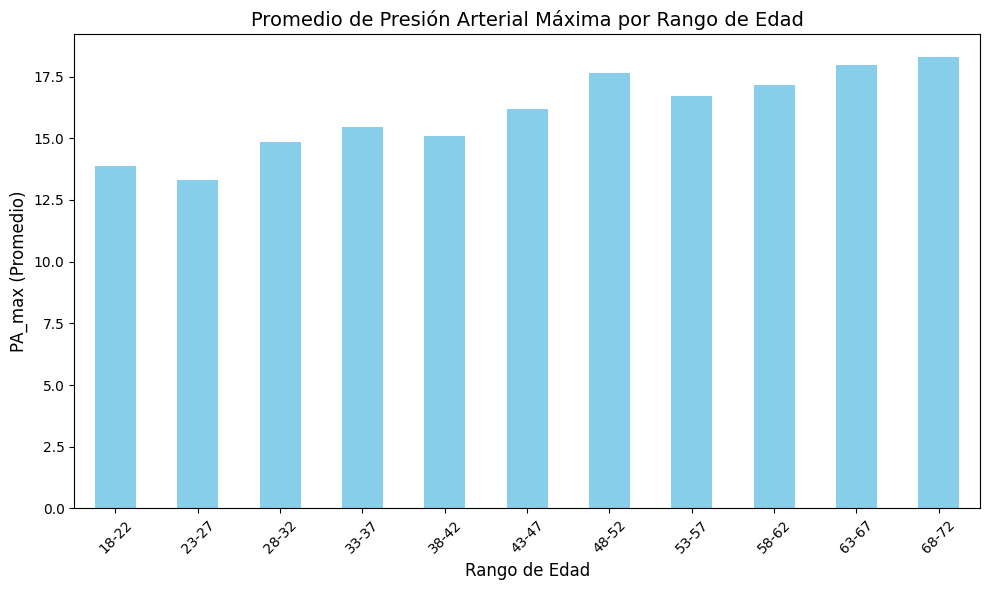

In [ ]:
# Grafico de Presion Arterial por rango de edad
# Creamos los rangos de edad de 5 años (por ejemplo de 0-4, 5-9, etc.)
bins = range(18, 78, 5)
labels = [f'{i}-{i+4}' for i in bins[:-1]]

# Añadimos la columna 'Rango_edad' usando la función pd.cut()
df_util['Rango_edad'] = pd.cut(df_util['Edad'], bins=bins, labels=labels, right=False)

# Mostrar el DataFrame actualizado con la nueva columna
print(df_util[['PA_max', 'Rango_edad']].head())

# Contamos cuántas personas hay en cada rango de edad
rango_edad_counts = df_util['Rango_edad'].value_counts().sort_index()

df_util['PA_max'] = pd.to_numeric(df['PA_max'], errors='coerce')
pa_max_promedio = df_util.groupby('Rango_edad')['PA_max'].mean()

# Crear un gráfico de barras con el promedio de PA_max
plt.figure(figsize=(10,6))
pa_max_promedio.plot(kind='bar', color='skyblue')

# Añadir etiquetas y título
plt.title('Promedio de Presión Arterial Máxima por Rango de Edad', fontsize=14)
plt.xlabel('Rango de Edad', fontsize=12)
plt.ylabel('PA_max (Promedio)', fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Conclusion Final:
Estimados Gerentes, Después de realizar un análisis detallado de los datos obtenidos que corresponden a diferentes factores que expliquen la Presion Arterial de las personas del dataset, podemos afirmar que la variable que mejor explica e influye en la Presion Arterial es la edad, mientras la edad avanza la presion arterial tambien. Por lo tanto es importante mantener un cuerpo joven, recurriendo a una vida mas saludable que puede incluir dietas sanas, ejercicio fisico, hacer ayunos, etc.

La presión arterial máxima (PA_max)
promedio tiende a aumentar con la edad,
alcanzando su punto máximo en el grupo de 60-64 años,
donde supera los 20 mmHg. A partir de este grupo, la PA_max disminuye ligeramente,
pero sigue siendo alta en personas de 65-79 años, lo que refleja una prevalencia de hipertensión en edades avanzadas.
Los grupos más jóvenes (15-39 años) presentan una PA_max menor, indicando un mejor estado cardiovascular.

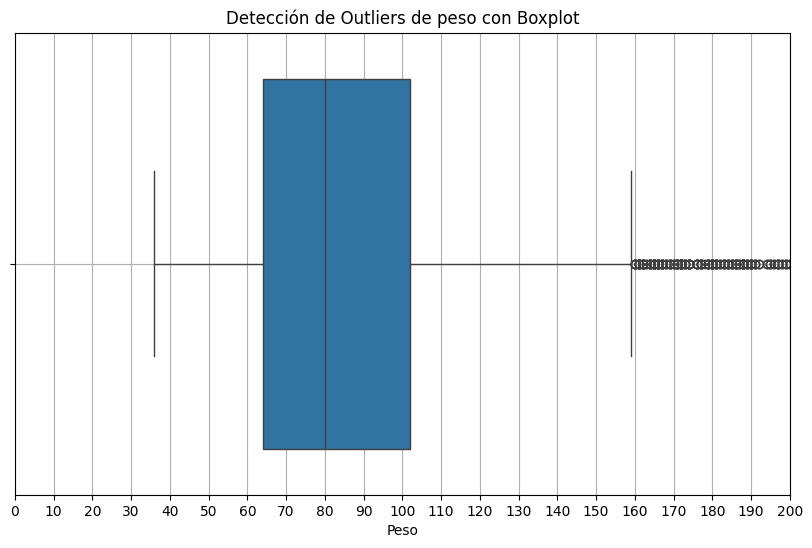

In [ ]:
# Crear un boxplot para la columna de interés
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_util['Peso'])

# Mostrar el gráfico
plt.title('Detección de Outliers de peso con Boxplot')
plt.xlim(0, 200)
plt.xticks(range(0, 201, 10))
plt.grid(True)
plt.show()

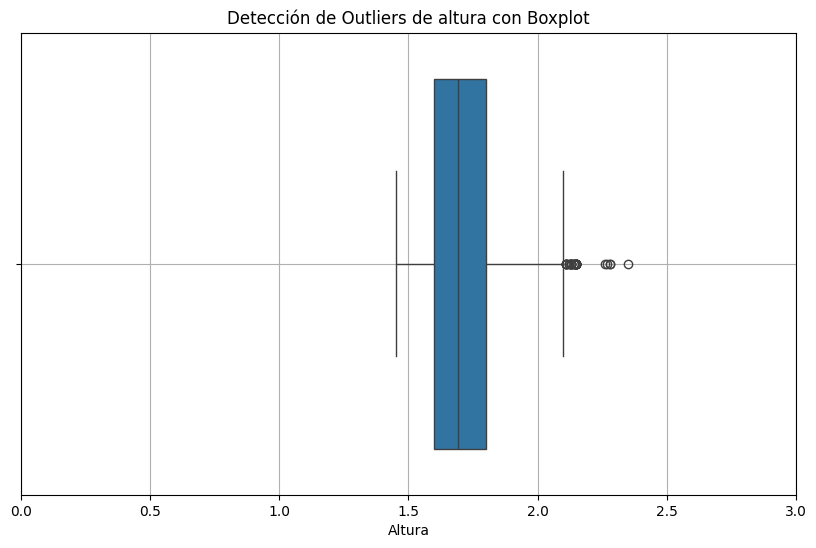

In [ ]:
# Crear un boxplot para la columna de interés
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_util['Altura'])

# Mostrar el gráfico
plt.title('Detección de Outliers de altura con Boxplot')
plt.xlim(0, 3)
plt.grid(True)
plt.show()

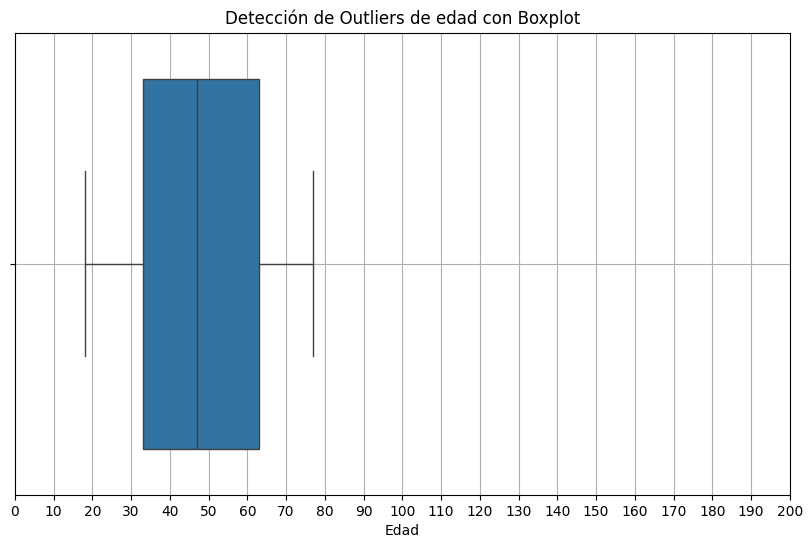

In [ ]:
# Crear un boxplot para la columna de interés
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_util['Edad'])

# Mostrar el gráfico
plt.title('Detección de Outliers de edad con Boxplot')
plt.xlim(0, 200)
plt.xticks(range(0, 201, 10))
plt.grid(True)
plt.show()

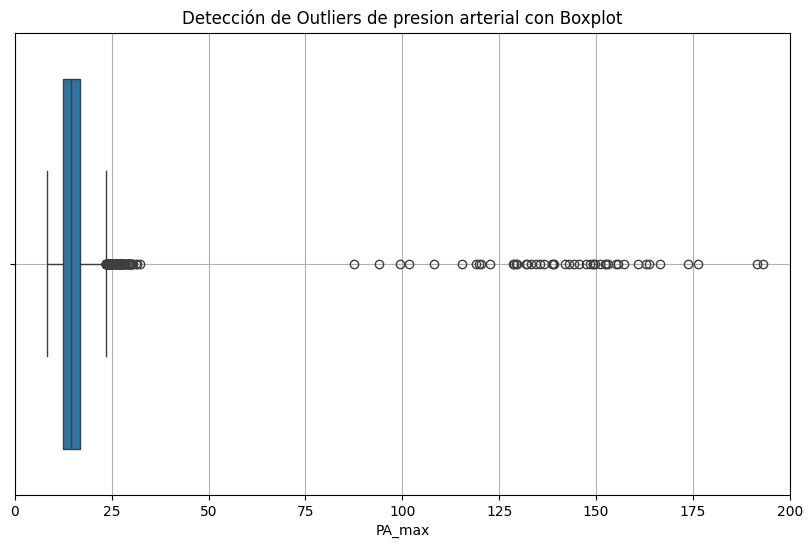

In [ ]:
# Crear un boxplot para la columna de interés
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_util['PA_max'])

# Mostrar el gráfico
plt.title('Detección de Outliers de presion arterial con Boxplot')
plt.xlim(0, 200)
plt.grid(True)
plt.show()